# Project 1 - Google Play Store


In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/Nick-Kolowich/Project-1/master/googleplaystore.csv'
df1 = pd.read_csv(url)

url_reviews = 'https://raw.githubusercontent.com/Nick-Kolowich/Project-1/master/googleplaystore_user_reviews.csv'
df2 = pd.read_csv(url_reviews)


In [ ]:
df1.head()

In [ ]:
cat_counts = df1.Category.value_counts()
cat_counts_dict = cat_counts.to_dict()
for k in cat_counts_dict.keys():
    print(k)

for i in cat_counts_dict.values():
    print(i)

listed_categories = list(cat_counts_dict.items())[:-1]

In [ ]:
def cat_mean(x):
    cat_categories_list = []
    cat_mean_list = []
    for cat in cat_counts_dict:
        # get the average rating of each category
        #print(f"{cat} mean = {df1.loc[(df1['Category']==cat)]['Rating'].mean()}")
        cat_categories_list.append(cat)
        cat_mean_list.append(df1.loc[(df1['Category']==cat)]['Rating'].mean())
    cat_mean_dict = {'Category': cat_categories_list, 'Mean': cat_mean_list}
    cat_mean_df = pd.DataFrame(cat_mean_dict)
    return cat_mean_df

In [ ]:
cat_mean(df1)
cat_mean_df = cat_mean_df[cat_mean_df['Category'] != '1.9']
fin_df = cat_mean_df.sort_values('Mean',ascending=False)
# display(fin_df[fin_df['Category']=='1.9'])
# cat_list()
# fin_df
# print(cat_categories_list)
# print(cat_mean_list)
sns.set(context='notebook',style="darkgrid", palette='deep', rc={'figure.figsize':(21,13)})
plot = sns.barplot(x=fin_df.Category, y=fin_df.Mean)
for p in plot.patches:
             plot.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
plot.set_xticklabels(labels=fin_df.Category,rotation=90)

In [ ]:
print(sorted(cat_mean(df1), reverse=True))

In [ ]:
df1.loc[(df1['Category']=='FAMILY')]['Rating'].mean()

In [ ]:
z = pd.DataFrame(listed_categories)
z.columns = ['Categories','Number of Ratings']

In [ ]:
plt.figure(figsize=(13,8))

z.plot(kind='barh', colormap='icefire')

plt.yticks(z.index, z["Categories"].values)

plt.show()

In [ ]:
reviews_df = df1[df1['Category'] != '1.9'].groupby('Category')[['Reviews']].agg(lambda x: x.astype(float).sum())
reviews_df

In [ ]:
Genre_counts = df1.loc[df1['Category'] == 'GAME'] ['Genres'].value_counts()

In [ ]:
sns.set(context='notebook',style="darkgrid", palette='deep', rc={'figure.figsize':(21,13)})
genre_plot = sns.barplot(x=Genre_counts.index, y=Genre_counts.values)
genre_plot.set_xticklabels(labels=Genre_counts.index, rotation=90)
for p in genre_plot.patches:
             genre_plot.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [ ]:
game_genre_counts = df1.loc[df1['Category'] == 'GAME'] ['Genres'].value_counts()
game_genres_rating = df1.loc[df1['Category'] == 'GAME'] [['Genres','Rating']]
# display(game_genres_rating.head())
# display(game_genre_counts.head())
game_mean_list=[]
for genre in game_genre_counts.index:
    # get the average rating of each category
    #print(f"{cat} mean = {df1.loc[(df1['Category']==cat)]['Rating'].mean()}")
    # cat_categories_list.append(cat)
    game_mean_list.append(df1.loc[(df1['Genres']==genre)]['Rating'].mean())
game_genre_dict = {'Genre': game_genre_counts.index, 'Mean': game_mean_list}
game_genre_df = pd.DataFrame(game_genre_dict)
game_genre_df = game_genre_df.sort_values('Mean',ascending=False)

display(game_genre_df.head())
sns.set(context='notebook',style="darkgrid", palette='deep', rc={'figure.figsize':(21,13)})
game_rat_plot = sns.barplot(x=game_genre_df.Genre, y=game_genre_df.Mean)
for p in game_rat_plot.patches:
             game_rat_plot.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
game_rat_plot.set_xticklabels(labels=game_genre_df.Genre,rotation=90)

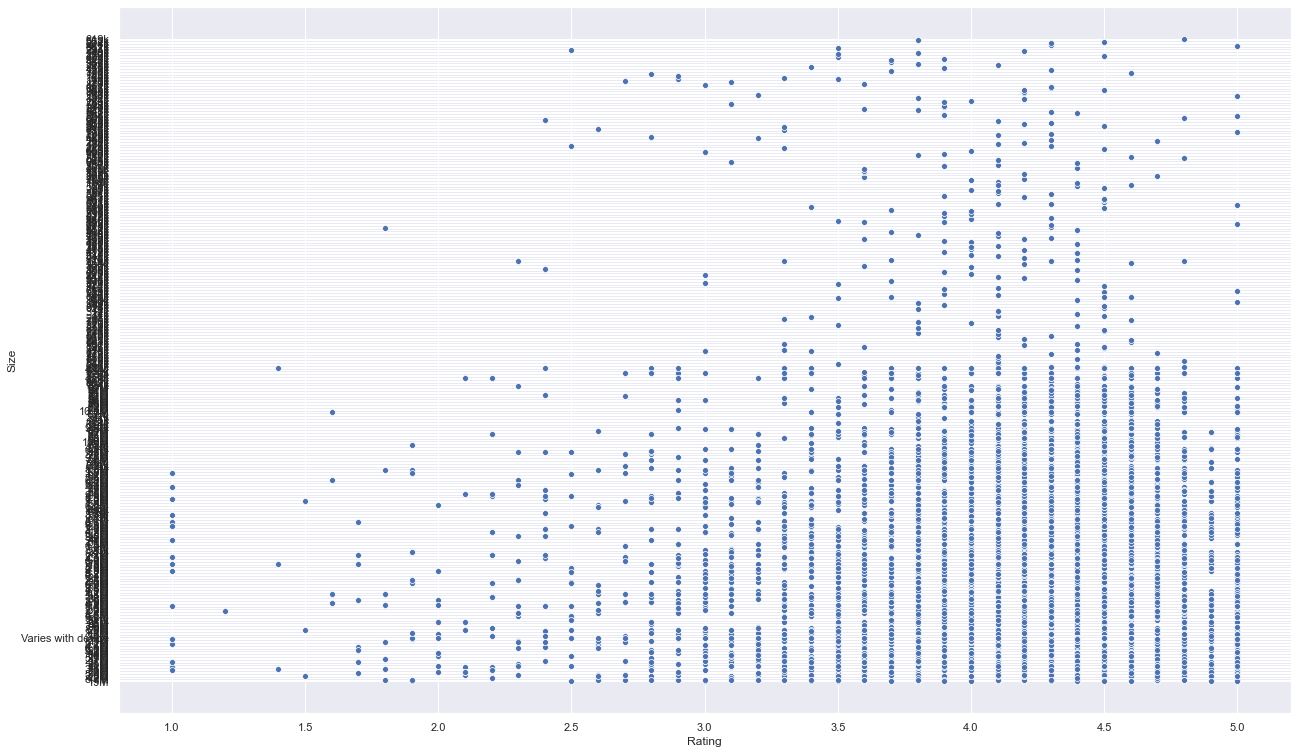

In [5]:
rating_modified = df1[df1['Rating'] != 19]
sns.set(rc={'figure.figsize':(21,13)})
sns.scatterplot(x='Rating', y='Size', ci=None, data=rating_modified)

In [ ]:
#df1_modified = df1[(pd.to_numeric(df1.Size, errors="coerce"))]

#print(df1_modified.head())

#df1_size_column_modified = df1.Size.str.replace('Varies with device' , '')
#print(df1_size_column_modified.head())

In [ ]:
'''def converttoM(x):   
  if 'k' or 'K' in x:
      z = x.replace('k','').replace('K','')
      return z'''

In [ ]:
'''q = converttoM(df1_size_column_modified)
while('' in q): 
    q.remove('') 
q'''

In [ ]:
'''def divide_by_1000(r):
    r / 1000
    return r'''

In [ ]:
'''new_df1_size_column = df1_size_column_modified.apply(lambda x : x / 1000 if x.endswith('') else x)'''